<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-4'

In [4]:
os.listdir(base_path)

['data_add_delta_-4_n250.csv',
 'data_add_delta_-4_n120.csv',
 'data_add_delta_-4_n60.csv',
 'data_add_delta_-4_n30.csv',
 'data_add_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,76.302939,25.766664,53.459926,-0.000630,165.528899,165.529466,-0.000567
1,0.0,1.0,70.188240,60.188064,55.577135,0.000091,195.953531,195.953436,0.000094
2,0.0,2.0,30.703688,33.520058,72.794765,0.001040,147.019551,147.018825,0.000726
3,0.0,3.0,68.702914,99.061963,29.920662,-0.000102,207.685438,207.685537,-0.000099
4,0.0,4.0,89.309132,41.073334,84.625737,0.000376,225.008579,225.008071,0.000507
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,68.670525,32.237662,62.109727,0.000436,173.018351,173.018186,0.000165
19996,999.0,16.0,25.787439,75.277265,58.305014,-0.000022,169.369697,169.369466,0.000230
19997,999.0,17.0,58.170930,67.809918,71.862599,-0.000265,207.843181,207.843538,-0.000356
19998,999.0,18.0,96.284324,55.595591,67.550893,0.000267,229.431076,229.431261,-0.000185


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    76.302939  25.766664  53.459926 -0.000630  165.528899   
      1.0    70.188240  60.188064  55.577135  0.000091  195.953531   
      2.0    30.703688  33.520058  72.794765  0.001040  147.019551   
      3.0    68.702914  99.061963  29.920662 -0.000102  207.685438   
      4.0    89.309132  41.073334  84.625737  0.000376  225.008579   
...                ...        ...        ...       ...         ...   
999.0 15.0   68.670525  32.237662  62.109727  0.000436  173.018351   
      16.0   25.787439  75.277265  58.305014 -0.000022  169.369697   
      17.0   58.170930  67.809918  71.862599 -0.000265  207.843181   
      18.0   96.284324  55.595591  67.550893  0.000267  229.431076   
      19.0   90.015537  39.954289  63.790945  0.001229  203.762000   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    165.529466 -0.000567  
      1.0    195.953436  0.000094  
      2.0    147.018825  0.000726  
      3.0    207.685537 -0.000099  
      4.0    225.008071  0.000507  
...                 ...       ...  
999.0 15.0   173.018186  0.000165  
      16.0   169.369466  0.000230  
      17.0   207.843538 -0.000356  
      18.0   229.431261 -0.000185  
      19.0   203.761209  0.000792  

[20000 rows x 7 columns]

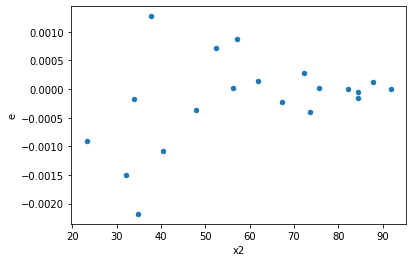

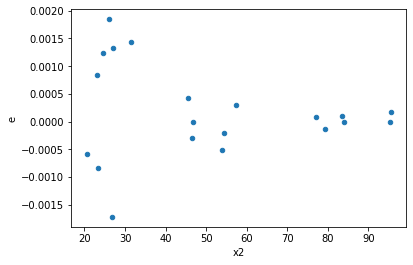

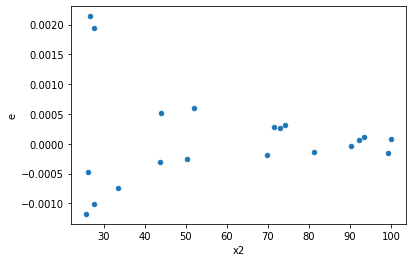

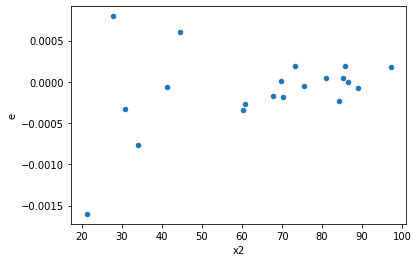

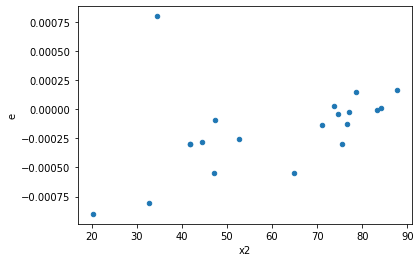

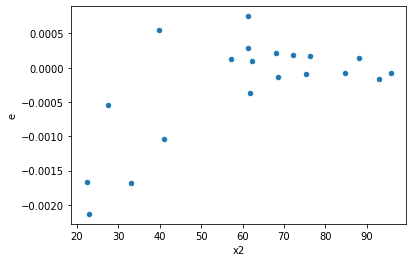

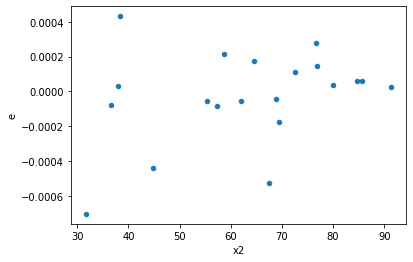

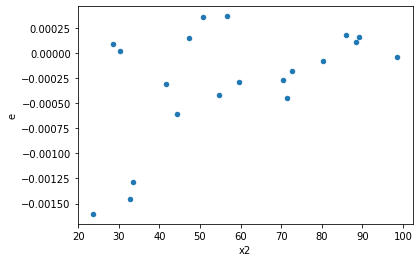

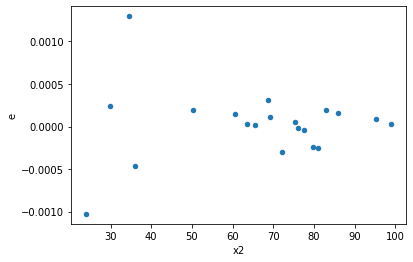

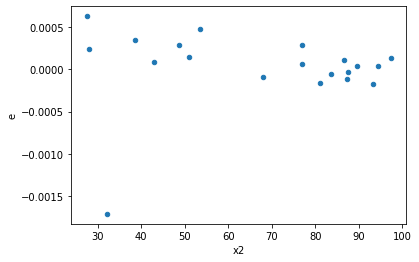

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
32.0,5.0,5.0,1.4820315738647464e-07,2.0742299409579582e-07,2.9640631477294928e-08,4.1484598819159166e-08,1.399585526743479,0.7212054589096002,0.6393972705451999,0.3606027294548001,Reject005=1 : Homoscedasticity
105.0,5.0,5.0,5.050258289619736e-08,2.3073255248976625e-07,1.0100516579239471e-08,4.614651049795325e-08,4.56872776119218,0.12092764488043328,0.9395361775597834,0.06046382244021664,Reject005=1 : Homoscedasticity
210.0,5.0,5.0,1.1782941331551267e-07,1.4830609882189588e-07,2.3565882663102535e-08,2.9661219764379178e-08,1.258650914477318,0.8068643718555801,0.5965678140722099,0.40343218592779007,Reject005=1 : Homoscedasticity
213.0,5.0,5.0,2.9889227158487247e-07,4.6215228225898844e-07,5.97784543169745e-08,9.243045645179769e-08,1.5462169021916552,0.6441394291383533,0.6779302854308233,0.32206971456917666,Reject005=1 : Homoscedasticity
543.0,5.0,5.0,1.4833080318032853e-07,1.6814264283552357e-07,2.9666160636065707e-08,3.3628528567104716e-08,1.1335652422181617,0.8939318362004856,0.5530340818997572,0.4469659181002428,Reject005=1 : Homoscedasticity
679.0,5.0,5.0,4.5368723468316584e-08,5.204934249606545e-08,9.073744693663317e-09,1.040986849921309e-08,1.1472516420351633,0.8838539664522065,0.5580730167738968,0.44192698322610324,Reject005=1 : Homoscedasticity
906.0,5.0,5.0,9.592486729933295e-08,2.2142553001749552e-07,1.918497345986659e-08,4.42851060034991e-08,2.308322505430615,0.3798814970307447,0.8100592514846277,0.18994074851537235,Reject005=1 : Homoscedasticity
999.0,5.0,5.0,1.6946969642202526e-08,1.48383764663861e-07,3.389393928440505e-09,2.96767529327722e-08,8.755769780477177,0.032616122379478085,0.983691938810261,0.016308061189739043,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.727337667060116e-06,1.2120828702775827e-07,3.4546753341202317e-07,2.4241657405551652e-08,0.07017058062194154,0.011131937169792038,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,1.1025104978880303e-05,1.940849217213206e-07,2.2050209957760606e-06,3.881698434426412e-08,0.017603906910012176,0.0004197657745863124,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,1.0539018285245363e-05,2.6293261256050244e-07,2.1078036570490724e-06,5.258652251210049e-08,0.02494849192249798,0.0009782796931874073,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,4.208957561911741e-06,1.0548899007546906e-08,8.417915123823482e-07,2.1097798015093813e-09,0.0025062973081523576,3.386321811773232e-06,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,8.86314251172801e-07,9.296314993941403e-08,1.772628502345602e-07,1.8592629987882808e-08,0.1048873464647579,0.027156665810498568,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,2.0127779442495296e-06,9.332353379913347e-08,4.0255558884990593e-07,1.8664706759826694e-08,0.04636553876484842,0.004279292980903959,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,2.23542559616001e-06,1.6257178359346394e-07,4.47085119232002e-07,3.251435671869279e-08,0.0727252044857713,0.012070410553525212,Reject005=0 : Heteroscedasticity
7.0,5.0,5.0,6.786987560894733e-07,5.390874916600267e-08,1.3573975121789464e-07,1.0781749833200533e-08,0.07942956824705871,0.014718726024749622,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,2.882185044161894e-06,5.611444081875514e-08,5.764370088323787e-07,1.1222888163751028e-08,0.019469409478901994,0.0005364515141935249,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    882
Reject005=1 : Homoscedasticity      118
Name: Result_test, dtype: int64